## Observations and Insights

In [ ]:
#3 data observations: 

# 1. Capomulin and Ramicane treatments resulted in significantly smaller tumor volumes over the course of treatment 
#    than the other options

# 2. The Ceftamin treatment is the less stable of the 4 most promising treatments since it hide a wider IQR.

# 3. Tumor Weight and Volume are strongly correlated. Which makes sense, because as the volume increases we would 
#    generally expect the weight to increase as well

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].nunique()
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data[combined_data["Mouse ID"].isin(dup_df)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = clean_df['Mouse ID'].nunique()
mice_count2

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tv_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tv_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tv_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tv_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tv_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({
    "Mean Tumor Vol": tv_mean,
    "Median Tumor Vol": tv_median,
    "Tumor Vol Variance": tv_var,
    "Tumor Vol Std. Dev.": tv_std,
    "Tumor Vol Std. Error": tv_sem})
summary_stats_df

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen
summary_stats_df

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2_df = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count of Timepoints')

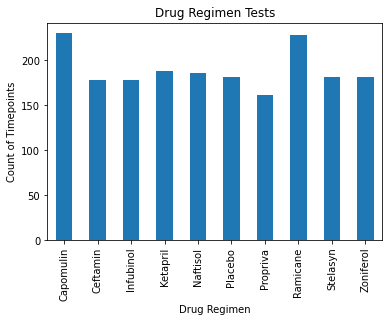

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Use DataFrame.plot to plot the data frame

pd_bp_data = clean_df.groupby("Drug Regimen").count()["Timepoint"]
pd_bp = pd_bp_data.plot.bar(title="Drug Regimen Tests")

pd_bp.set_xlabel("Drug Regimen")
pd_bp.set_ylabel("Count of Timepoints")



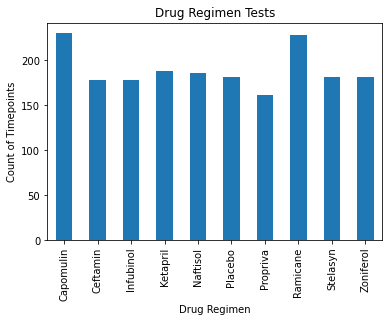

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

py_bp_data = clean_df.groupby('Drug Regimen').count()['Timepoint']
py_bp_df = pd.DataFrame(py_bp_data)
py_bp_df.plot.bar(legend=False)
plt.title("Drug Regimen Tests")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints")
plt.show()


<AxesSubplot:title={'center':'Mice Studied by Gender'}, ylabel='Mouse ID'>

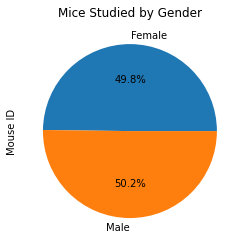

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pd_pie_data=clean_df.groupby("Sex").nunique()["Mouse ID"]
pd_pie_data.plot.pie(title="Mice Studied by Gender", autopct="%1.1f%%")

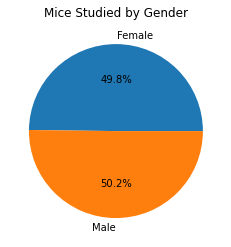

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

py_pie_data=clean_df.groupby("Sex").nunique()["Mouse ID"]
py_pie_df=pd.DataFrame(py_pie_data)
plt.pie(py_pie_data, labels=py_pie_data.index, autopct="%1.1f%%")
plt.title("Mice Studied by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(clean_df.groupby("Mouse ID")['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, max_tp_df, on='Mouse ID')
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


for treatment in treatments:
    
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment]
    
    volume_df = treatment_df.loc[treatment_df["Timepoint"]== treatment_df["max_timepoint"]]
    
    values = volume_df["Tumor Volume (mm3)"]
    tumor_vol_list.append(values)
    
    # Calculate the IQR
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    # Check for outliers
    outliers_count = (values.loc[(volume_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (volume_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
                                 
    print(f"Number of {treatment} outliers: {outliers_count}")


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


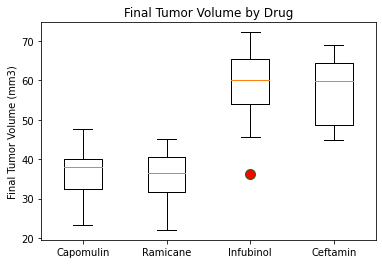

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Infubinol just has 1 outlier

#change style and color for any outliers to make them stand out 
flierprops = dict(marker='o', markerfacecolor='r', markersize= 10, linestyle='none', markeredgecolor='g')

#box plot
plt.boxplot(tumor_vol_list, flierprops=flierprops)

# Add labels
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


# Line and Scatter Plots

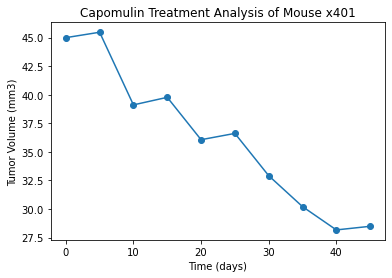

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_x401 = clean_df.loc[clean_df["Mouse ID"] == "x401"]

plt.plot(mouse_x401["Timepoint"], mouse_x401["Tumor Volume (mm3)"], marker = 'o')

# Add labels
plt.title("Capomulin Treatment Analysis of Mouse x401")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")

plt.show()

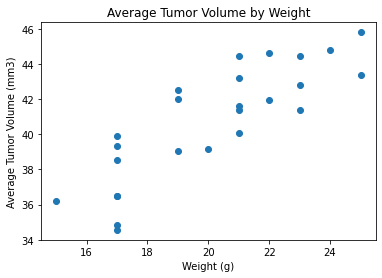

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a Data Frame for just the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# determine average tumor volume for each mouse ID
avg_vol_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})

# Merge 
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
clean_avg_vol_df = avg_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
clean_avg_vol_df

x = clean_avg_vol_df['Weight (g)']
y = clean_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

# Correlation and Regression

The correlation between weight and average tumor volume for the Capomulin treatment is 0.84.


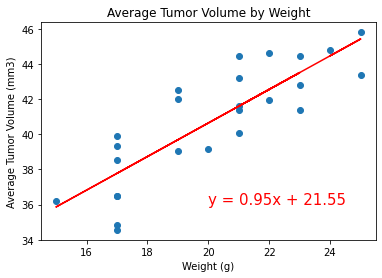

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#copied from last problem
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
clean_avg_vol_df = avg_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
clean_avg_vol_df

# Calculate the correlation coefficient
correlation = st.pearsonr(x,y)

print(f"The correlation between weight and average tumor volume for the Capomulin treatment is {round(correlation[0],2)}.")

x = clean_avg_vol_df['Weight (g)']
y = clean_avg_vol_df['avg_tumor_vol']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()